In [1]:
import numpy as np 
import pandas as pd
import csv 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)
data=pd.read_csv(f'{path}/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

Path to dataset files: /kaggle/input/network-intrusion-dataset


In [3]:
data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
data.columns = data.columns.str.strip()

In [5]:
data.loc[:,"Label"].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [6]:
print(data.isin([np.inf, -np.inf]).sum())

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


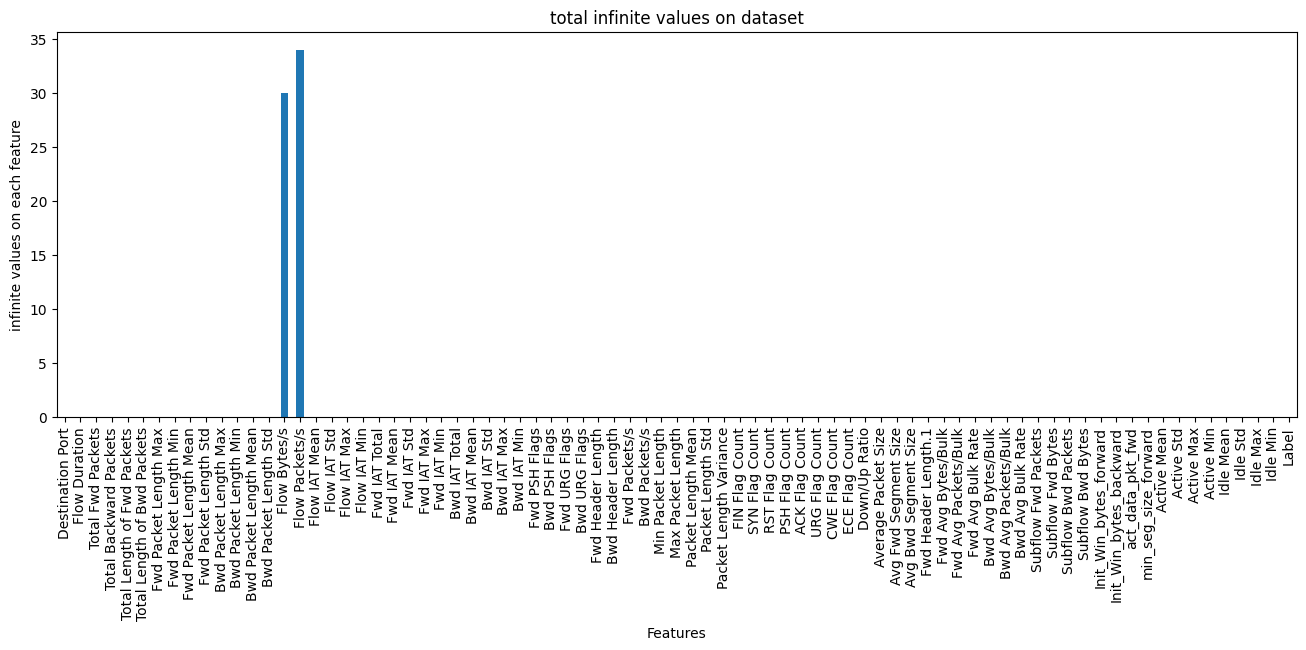

In [7]:
def inf_vlus(data):
    inf_vlus=data.isin([np.inf , -np.inf]).sum()
    fig= plt.figure(figsize=(16,5))
    inf_vlus.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("infinite values on each feature")
    plt.title("total infinite values on dataset")
    plt.show()

inf_vlus (data)

In [8]:
data.replace([np.inf , -np.inf] , np.nan , inplace=True)
data.loc[:,'Label']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name: Label, Length: 225745, dtype: object

In [9]:
data.isnull().any()

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                          False
Length: 79, dtype: bool

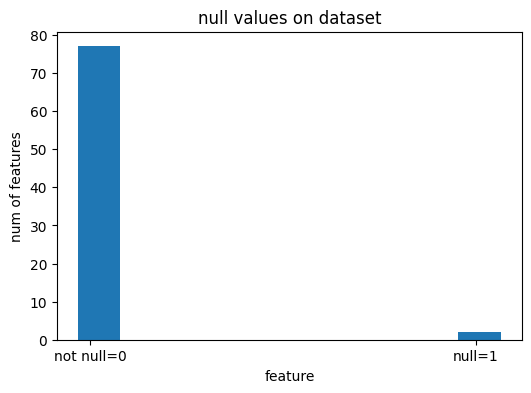

In [10]:
plt.figure(1,figsize=(6,4))
plt.hist(data.isna().sum())

plt.xticks([1,32],labels=['not null=0','null=1'])
plt.title('null values on dataset')
plt.xlabel('feature')
plt.ylabel('num of features')

plt.show()


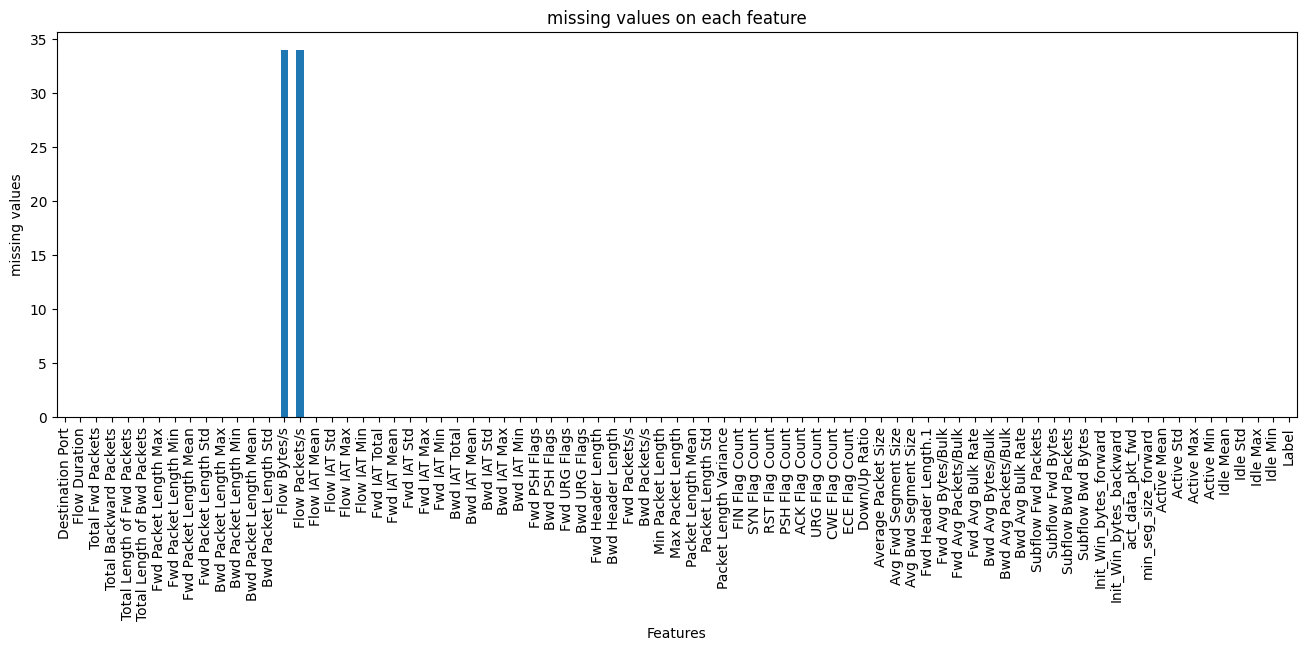

In [11]:
def plotmissingvalus(data , title):
    missing_vals = data.isnull().sum()
    fig = plt.figure(figsize=(16,5))
    missing_vals.plot(kind='bar')
    plt.xlabel('Features') 
    plt.ylabel('missing values')
    plt.title(title)
    plt.show()
title='missing values on each feature' 
plotmissingvalus(data,title)

In [12]:
data['Flow Bytes/s']= data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].mean())
data['Flow Packets/s']=data['Flow Packets/s'].fillna(data['Flow Packets/s'].mean())
data['Label']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name: Label, Length: 225745, dtype: object

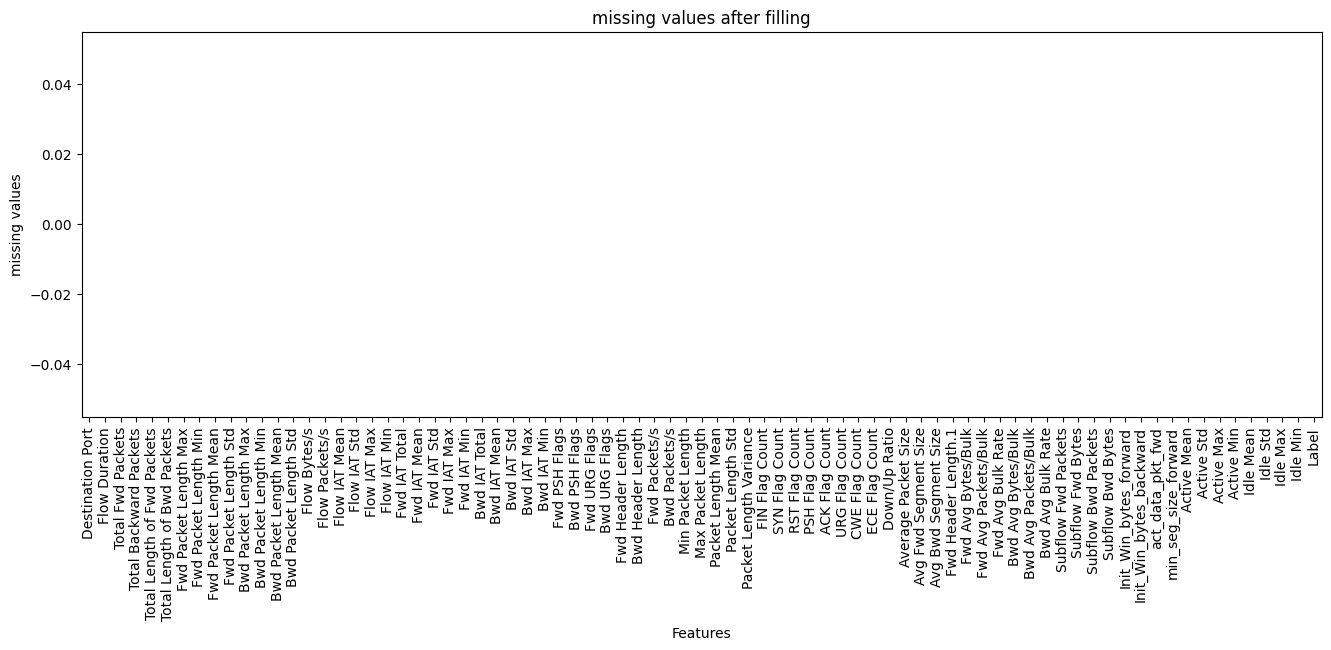

In [13]:
title1="missing values after filling"
plotmissingvalus(data, title1)

In [14]:
data= data.dropna()
data['Label']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name: Label, Length: 225745, dtype: object

In [15]:
(data.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [16]:
data['Label']= data['Label'].map({'BENIGN':0, 'DDoS':1})
data['Label']

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: Label, Length: 225745, dtype: int64

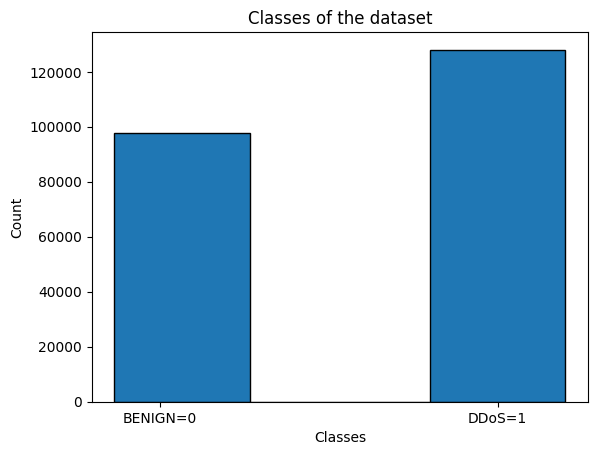

In [17]:
plt.title("Classes of the dataset")
plt.hist(data['Label'], bins=[0,0.3,0.7,1], edgecolor='black')
plt.xticks([0.1,0.85], labels=['BENIGN=0' , 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [18]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


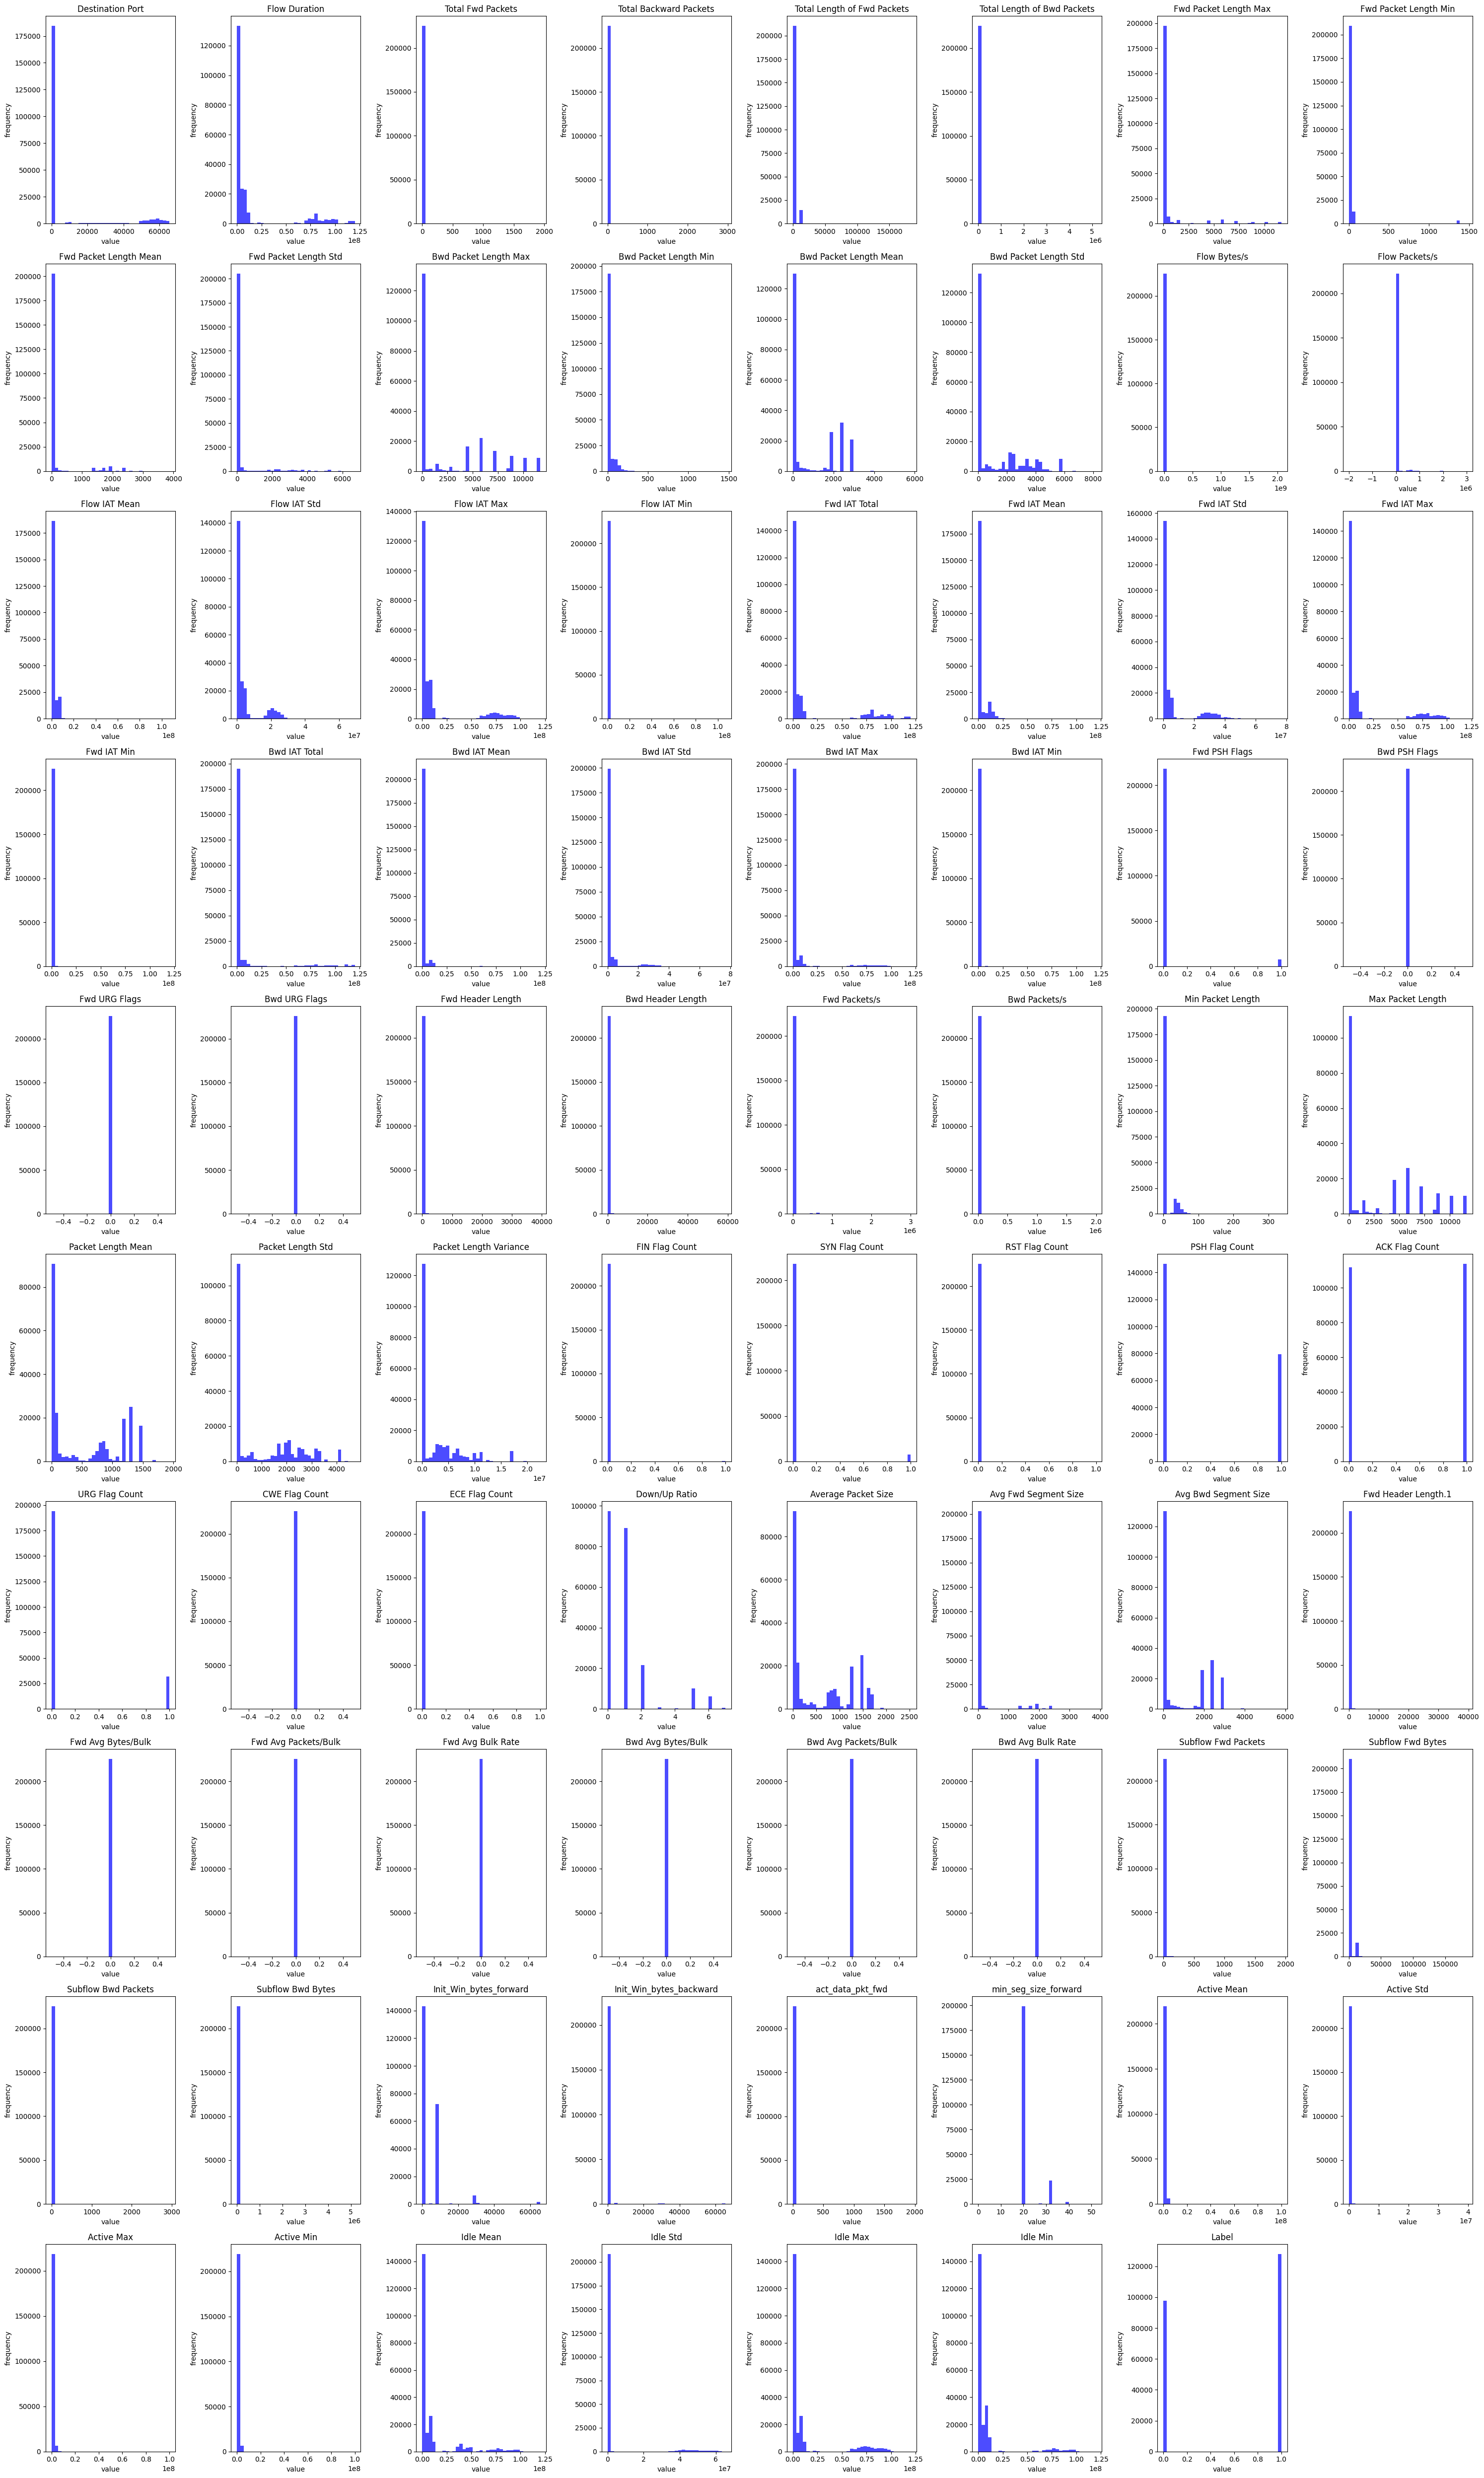

In [19]:
my_features= len(data.columns)
fig, axes = plt.subplots(10, 8 , figsize=(30,50))
axes = axes.flatten()

for i , col in enumerate(data.columns):
    axes[i].hist(data[col],bins=35, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("value")
    axes[i].set_ylabel("frequency")

for j in range (i+1 , len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

In [20]:
X= data.drop('Label', axis=1)
Y= data['Label']

x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.3 ,random_state=42)

print("train size = ",x_train.shape)
print("test size = ",x_test.shape)

train size =  (158021, 78)
test size =  (67724, 78)


In [21]:
model= RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)
pred= model.predict(x_test)

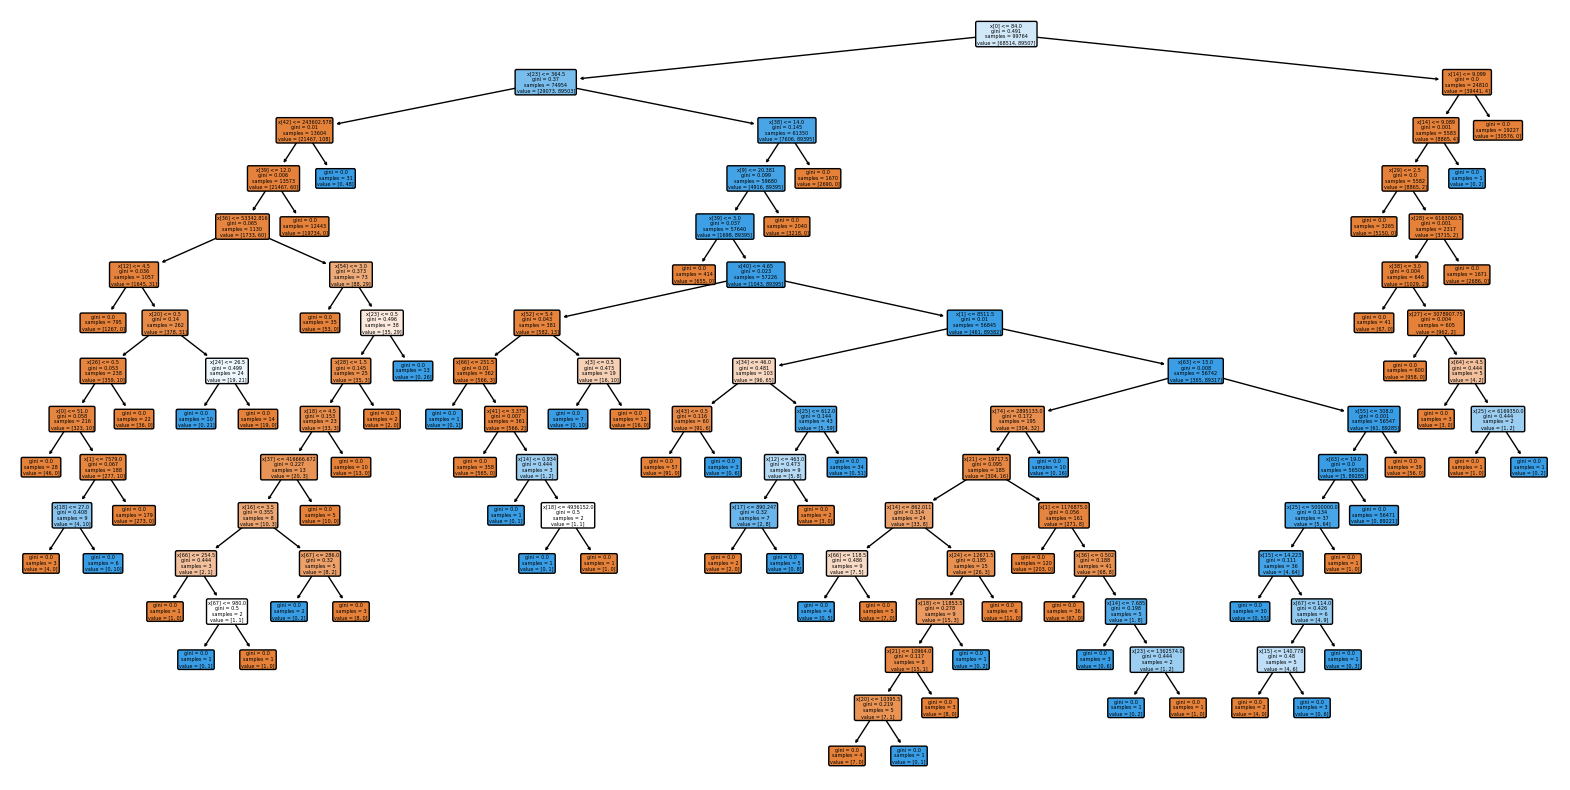

In [22]:
estimator= model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [23]:
def confusion_matricx(y_true, y_pred, classes, title):
    cm= confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()   

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, pred)
f1= f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall= recall_score(y_test, pred)

print("Model Evaluations")
print(f'Accuracy: {accuracy:.4f}')
print(f'F1_score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Model Evaluations
Accuracy: 0.9999
F1_score: 0.9999
Precision: 0.9999
Recall: 0.9998


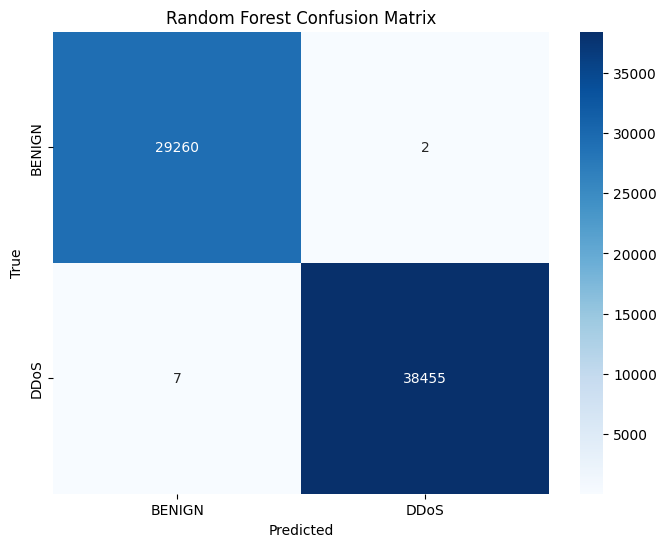

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matricx(y_test, pred, ['BENIGN', 'DDoS'], "Random Forest Confusion Matrix")